In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
#Read the Airbnb Data
df = pd.read_csv("/content/Airbnb_Open_Data.csv", low_memory = False, on_bad_lines='skip')

In [42]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50981 entries, 0 to 50980
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              50981 non-null  int64  
 1   NAME                            50812 non-null  object 
 2   host id                         50981 non-null  int64  
 3   host_identity_verified          50796 non-null  object 
 4   host name                       50738 non-null  object 
 5   neighbourhood group             50951 non-null  object 
 6   neighbourhood                   50964 non-null  object 
 7   lat                             50972 non-null  float64
 8   long                            50972 non-null  float64
 9   country                         50893 non-null  object 
 10  country code                    50901 non-null  object 
 11  instant_bookable                50901 non-null  object 
 12  cancellation_policy             

In [44]:
df.duplicated().value_counts()

,count
False,50981


In [45]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [46]:
df.drop_duplicates(inplace = True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace = True)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$','', regex= False)
df['service fee'] = df['service fee'].str.replace('$','', regex= False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','', regex= False)
df['service fee'] = df['service fee'].str.replace(',','', regex= False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
'price':'price_$',
'service fee': 'service_fee_$'
}, inplace = True)

#Drop all records with missing values
df.dropna(inplace = True)
#Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [47]:
df.duplicated().value_counts()

,count
False,38855


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38855 entries, 0 to 50979
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38855 non-null  object        
 1   NAME                            38855 non-null  object        
 2   host id                         38855 non-null  object        
 3   host_identity_verified          38855 non-null  object        
 4   host name                       38855 non-null  object        
 5   neighbourhood group             38855 non-null  object        
 6   neighbourhood                   38855 non-null  object        
 7   lat                             38855 non-null  float64       
 8   long                            38855 non-null  float64       
 9   country                         38855 non-null  object        
 10  country code                    38855 non-null  object        
 11  instant

In [49]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,38855.000000,38855.000000,38855.000000,38855.000000,38855.000000,38855.000000,38855.000000,38855,38855.000000,38855.000000,38855.000000,38855.000000
mean,40.727873,-73.950382,2012.498391,625.185407,125.038090,6.091829,30.306962,2018-11-18 09:04:29.895766272,1.442312,3.246892,5.331437,147.836598
min,40.506410,-74.244420,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688440,-73.982385,2008.000000,336.500000,67.000000,1.000000,3.000000,2018-07-31 00:00:00,0.200000,2.000000,1.000000,14.000000
50%,40.721470,-73.954510,2012.000000,624.000000,125.000000,2.000000,10.000000,2019-05-25 00:00:00,0.770000,3.000000,1.000000,117.000000
75%,40.762923,-73.933800,2018.000000,914.000000,183.000000,4.000000,34.000000,2019-06-24 00:00:00,2.130000,4.000000,2.000000,269.000000
max,40.913060,-73.712990,2022.000000,1200.000000,240.000000,5645.000000,966.000000,2022-05-21 00:00:00,90.000000,5.000000,327.000000,426.000000
std,0.055236,0.047725,5.764942,333.006161,66.604363,36.607178,50.857937,NaN,1.898453,1.303769,26.770522,133.637660


In [50]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,20462
Private room,17548
Shared room,841
Hotel room,4


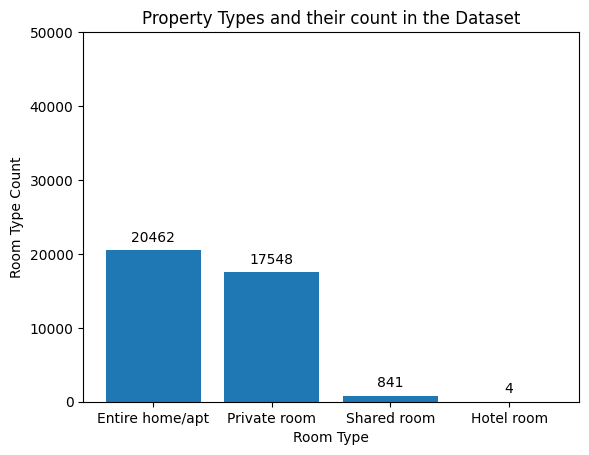

In [51]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [52]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,16463
Brooklyn,16417
Queens,4742
Bronx,917
Staten Island,316


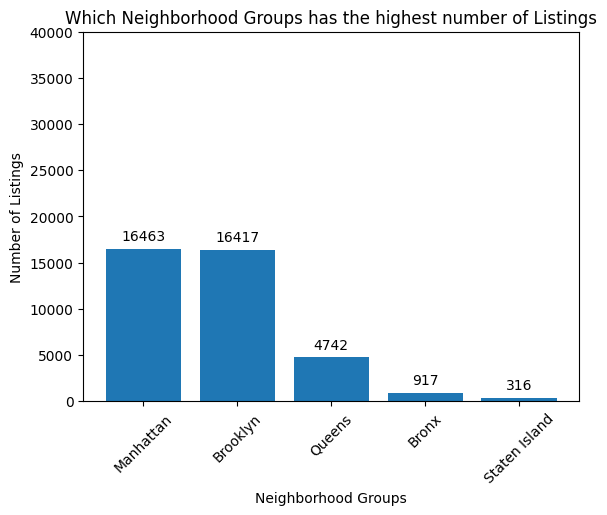

In [53]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4 );
plt.ylim([0, 40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

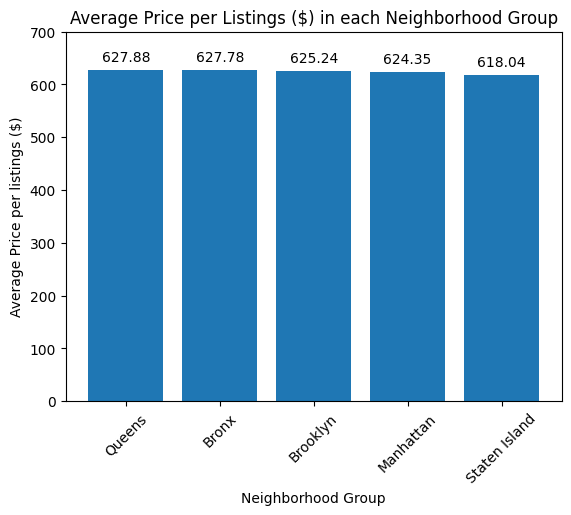

In [54]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4 );
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

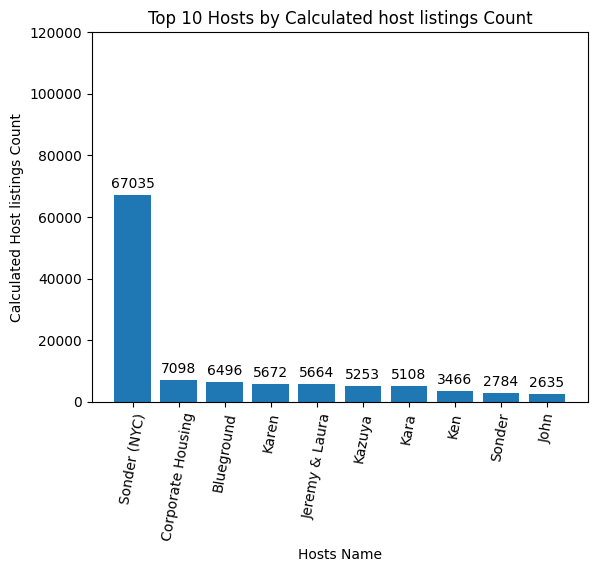

In [56]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host listings Count');

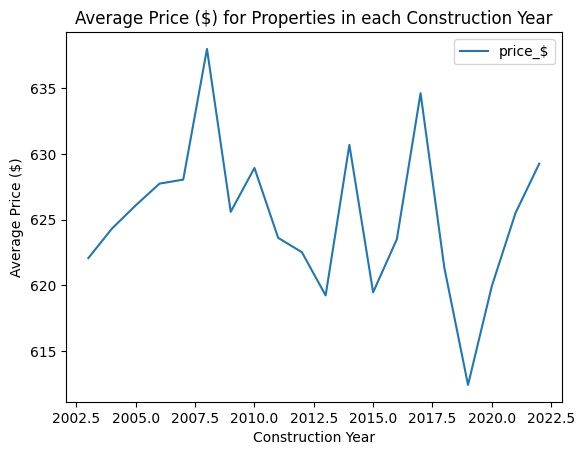

In [58]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

In [59]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review


,review rate number
host_identity_verified,
verified,3.254480
unconfirmed,3.239354


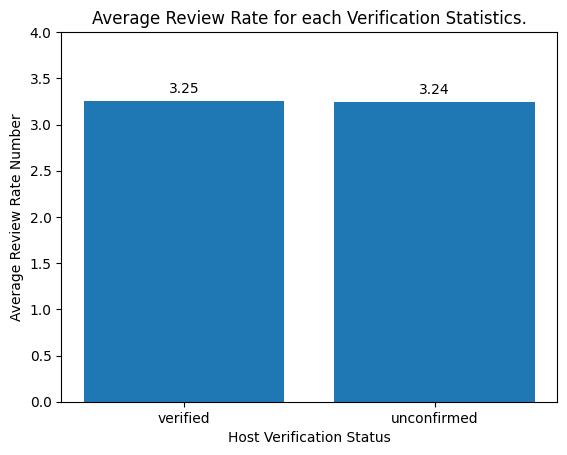

In [60]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

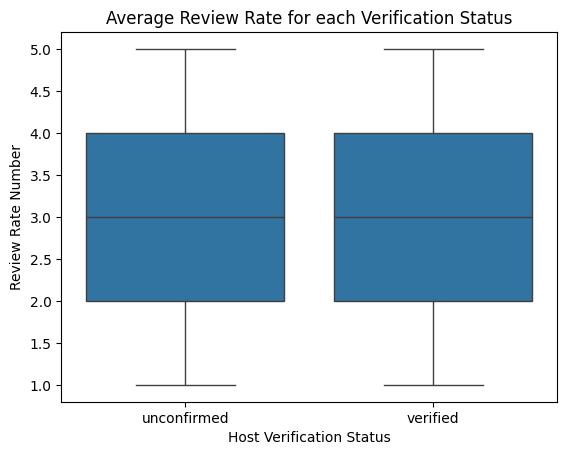

In [61]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [62]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])


np.float64(0.9999910013565855)

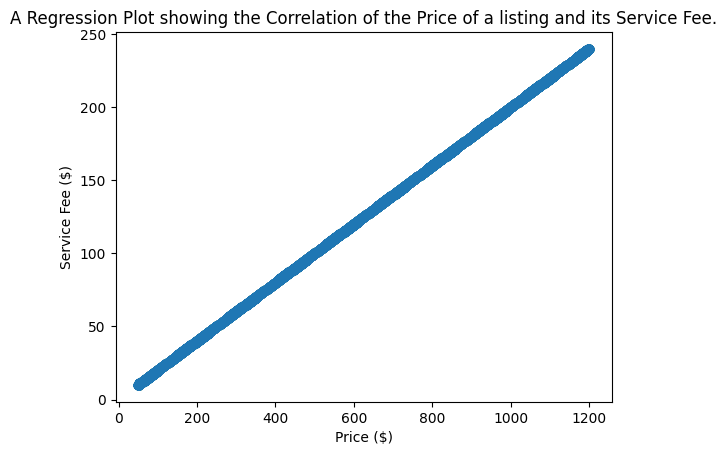

In [63]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.');

In [64]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.368732
                    Private room               3.314019
                    Shared room                3.232558
Brooklyn            Entire home/apt            3.206445
                    Private room               3.260025
                    Shared room                3.346290
Manhattan           Entire home/apt            3.236452
                    Hotel room                 3.500000
                    Private room               3.247599
                    Shared room                3.282913
Queens              Entire home/apt            3.268280
                    Private room               3.288384
                    Shared room                3.300654
Staten Island       Entire home/apt            3.412903
                    Private room               3.384615
                    Shared room                3.600000

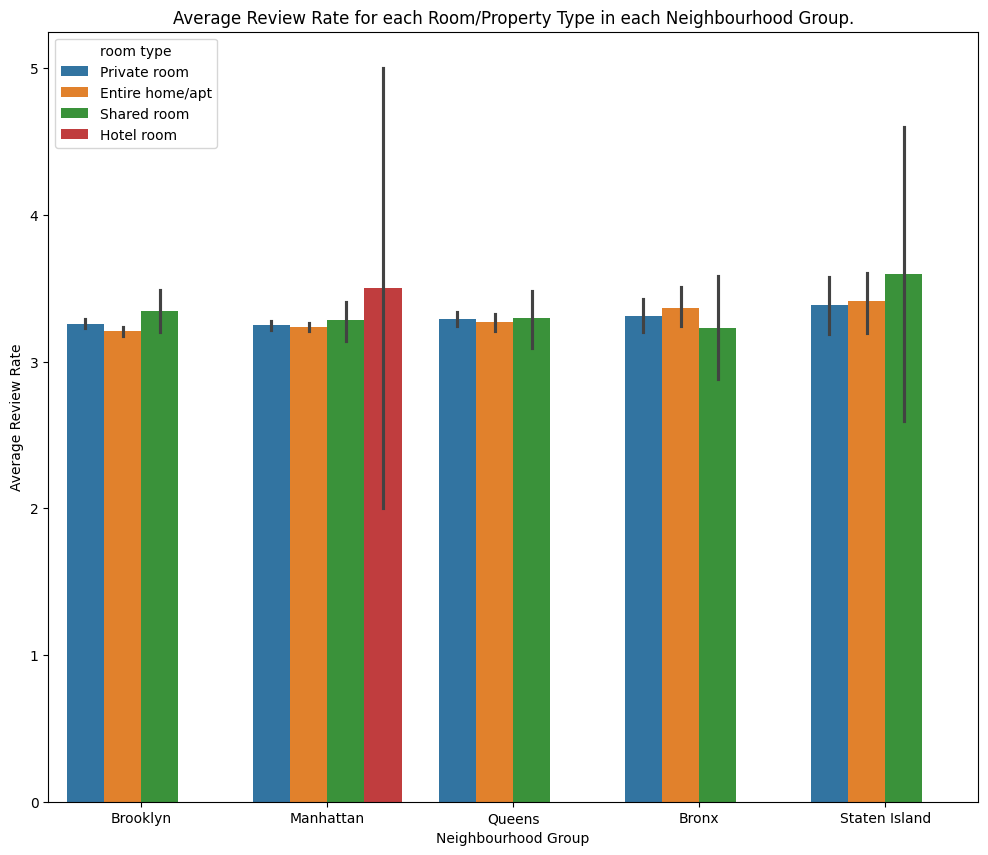

In [65]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');


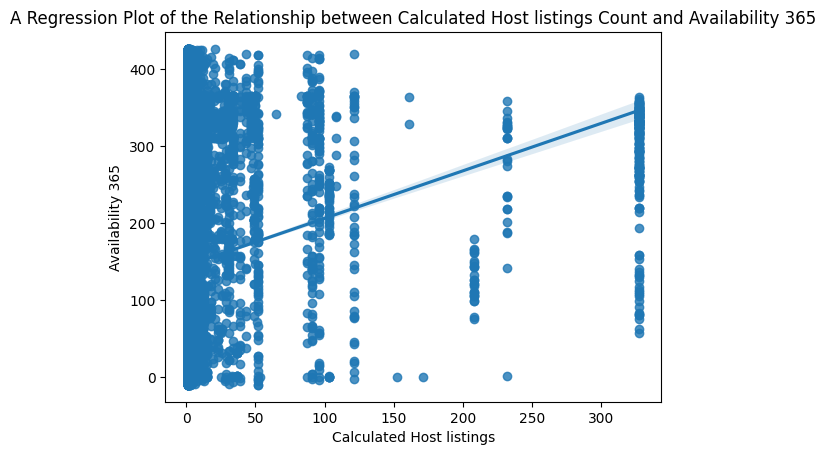

In [66]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365');

In [67]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.12346154863019491)